<a href="https://colab.research.google.com/github/resmi010/Pima-_indian_diabetes/blob/main/hranalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#import the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
# Data imputation
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Loading the dataset
df=pd.read_csv("/content/drive/MyDrive/AI_new/LuminarTechnolabs/AI/Assignments/HR_Analytics/train.csv")
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
#basic eda
#checking the unique values in Target variable
df["is_promoted"].unique()

array([0, 1])

<function matplotlib.pyplot.show(*args, **kw)>

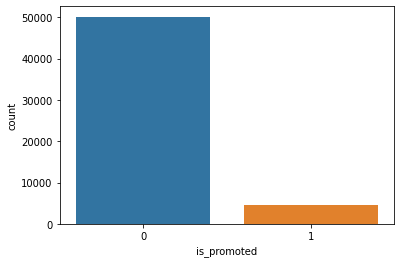

In [6]:
# plot the target variable
sns.countplot(x="is_promoted",data=df)
plt.show

In [7]:
# checking the value count in target vartiable
df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [8]:
#shape of the dataset
df.shape

(54808, 14)

In [9]:
#dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
cols_to_drop = ['employee_id']
# dropping columns
df = df.drop(cols_to_drop, axis=1)

In [11]:
#Identify the missing values
df.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
missing_value = 100 * df.isnull().sum()/len(df)
missing_value = missing_value.reset_index()
missing_value.columns = ['variables','missing values in percentage']


In [13]:
missing_value

,variables,missing values in percentage
0,department,0.000000
1,region,0.000000
2,education,4.395344
3,gender,0.000000
4,recruitment_channel,0.000000
5,no_of_trainings,0.000000
6,age,0.000000
7,previous_year_rating,7.524449
8,length_of_service,0.000000
9,KPIs_met >80%,0.000000


In [14]:
# Missing Completely at Random (MCAR) - Example
# Check the null row of Education
df[df['education'].isnull()]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
21,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
32,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0
43,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0
82,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54692,Sales & Marketing,region_2,NaN,f,sourcing,1,35,3.0,7,0,0,53,0
54717,Analytics,region_2,NaN,m,sourcing,1,32,3.0,4,0,0,86,0
54729,HR,region_2,NaN,f,other,1,28,3.0,2,0,0,53,0
54742,Sales & Marketing,region_31,NaN,m,other,1,28,4.0,3,0,0,47,0


In [15]:
df.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [16]:
impute=SimpleImputer(strategy='median')


In [17]:
df['previous_year_rating']=impute.fit_transform(df[['previous_year_rating']])

In [18]:
impute1=SimpleImputer(strategy='most_frequent')

In [19]:
 df['education']=impute1.fit_transform(df[['education']])

In [20]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [21]:
#Describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.0,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


In [22]:
#correlatrion on Datasetbased on target variable
df.corr()["is_promoted"]

no_of_trainings        -0.024896
age                    -0.017166
previous_year_rating    0.153230
length_of_service      -0.010670
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
is_promoted             1.000000
Name: is_promoted, dtype: float64

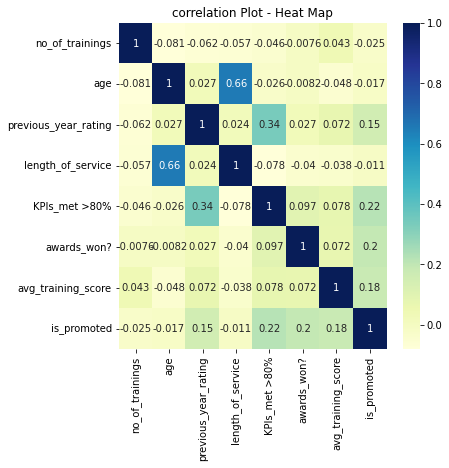

In [23]:
#Correlation using Heat Map in target dataset
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("correlation Plot - Heat Map")
plt.show()

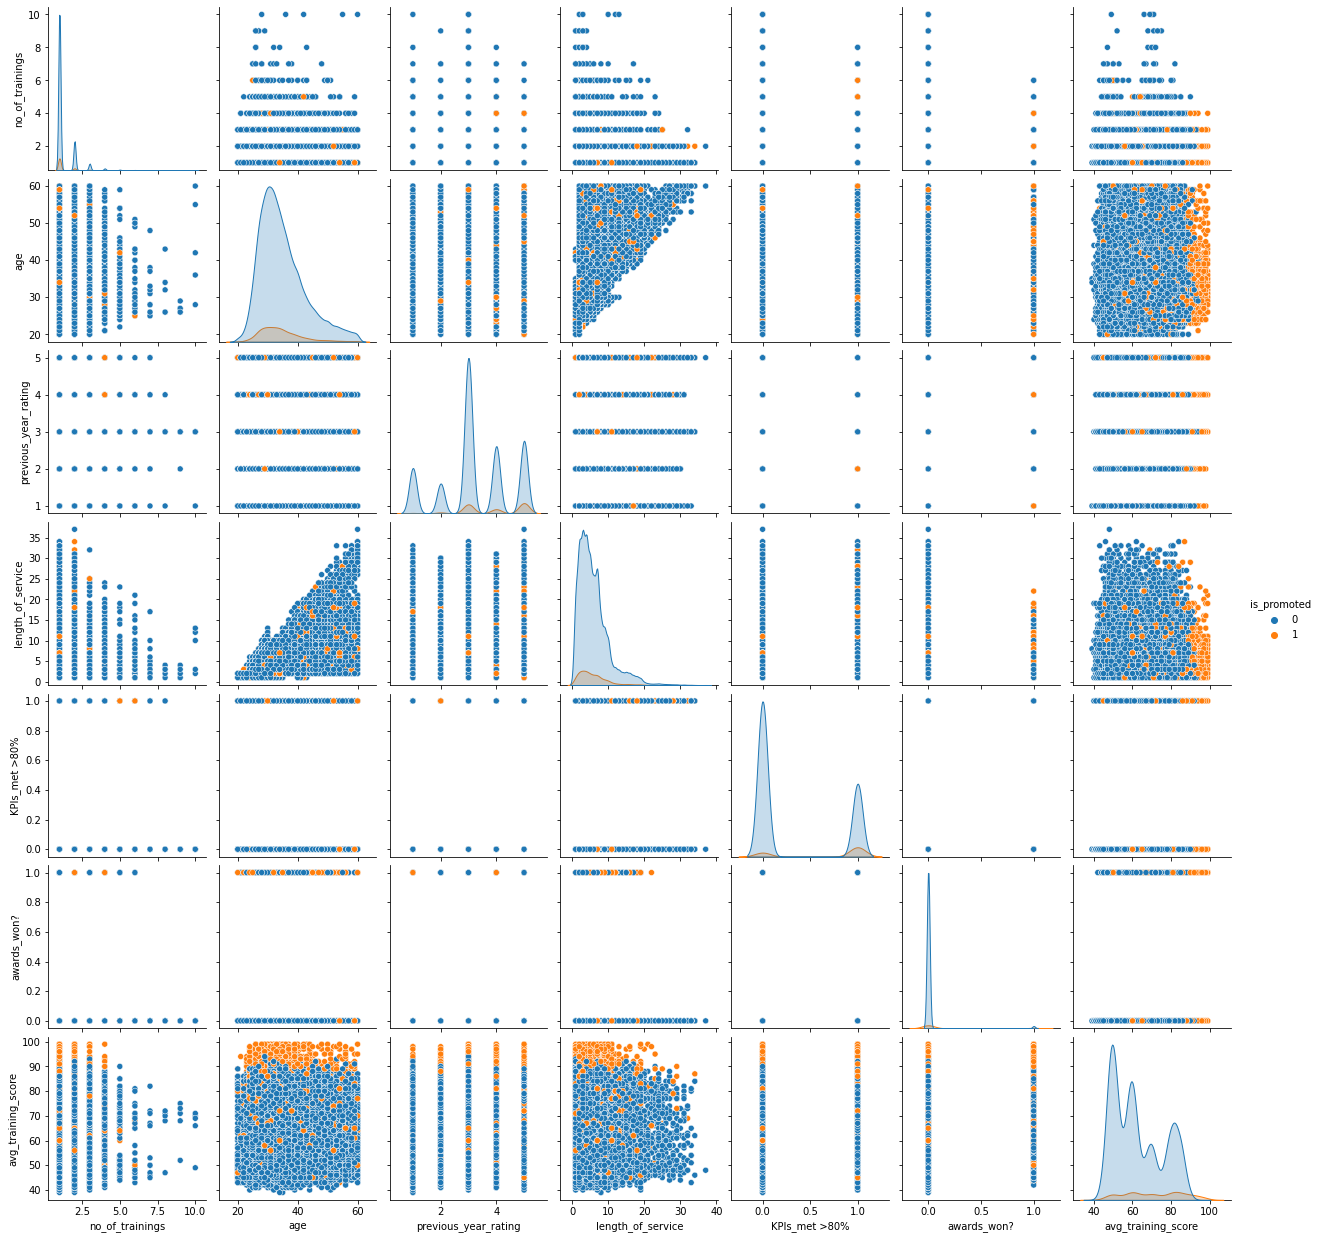

In [24]:

#pairplot using sns
sns.pairplot(df,hue="is_promoted")

In [25]:
df['work_fraction']=df['length_of_service']/df['age']

In [26]:
X=df.drop('is_promoted',1)
y=df.is_promoted



<ipython-input-26-45a51f9ce57f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X=df.drop('is_promoted',1)


In [27]:
X=pd.get_dummies(X)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [29]:
sm=SMOTE(random_state=42)
X_train.shape

(38365, 59)

In [30]:
X_res,y_res=sm.fit_resample(X_train,y_train)

In [31]:
y_train.value_counts()

0    35076
1     3289
Name: is_promoted, dtype: int64

In [32]:
y_res.value_counts()

0    35076
1    35076
Name: is_promoted, dtype: int64

In [33]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)
import joblib 
joblib.dump(scale,'/content/drive/MyDrive/luminar_projects/project_2/scale.pkl')


['/content/drive/MyDrive/luminar_projects/project_2/scale.pkl']

In [41]:
# Apply all classification Algorithms -- Include Train Acc, Test acc, Precision, Recall, F1 score  -- In For loop
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()



voting = VotingClassifier (estimators=[('Logistic_Regression',lr_clf),('Decision_Tree_Classifier', df_clf),('Random_Forest_Classifier',rf_clf),
                              ('AdaBoost_Classifier',adboost_clf),('Gradient_Boosting_Classifier',grad_clf)] ,voting='hard')

voting.fit(X_res,y_res)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gradient_Boosting_Classifier',
                              GradientBoostingClassifier())])

In [42]:
VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gradient_Boosting_Classifier',
                              GradientBoostingClassifier())])

VotingClassifier(estimators=[('Logistic_Regression', LogisticRegression()),
                             ('Decision_Tree_Classifier',
                              DecisionTreeClassifier()),
                             ('Random_Forest_Classifier',
                              RandomForestClassifier()),
                             ('AdaBoost_Classifier', AdaBoostClassifier()),
                             ('Gradient_Boosting_Classifier',
                              GradientBoostingClassifier())])

In [44]:
for clf in (lr_clf,df_clf,rf_clf,adboost_clf,grad_clf):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__,clf.score(X_train,y_train))
  print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

  print("=========================")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.9206568486902125
LogisticRegression 0.9200267591072189
DecisionTreeClassifier 0.9998175420304966
DecisionTreeClassifier 0.8992884510125889
RandomForestClassifier 0.9998175420304966
RandomForestClassifier 0.9337103934805084
AdaBoostClassifier 0.9246709240192884
AdaBoostClassifier 0.9245879705649821
GradientBoostingClassifier 0.9387462530952692
GradientBoostingClassifier 0.9390622149242839


In [49]:
from sklearn.model_selection import GridSearchCV
lr_clf = LogisticRegression()
df_clf= DecisionTreeClassifier()
rf_clf= RandomForestClassifier()
adboost_clf= AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()

clf_list=[lr_clf,df_clf,rf_clf,adboost_clf,grad_clf]

grid_params_lr= [{'penalty':['l1','l2'],'solver':['saga']}]

grid_params_df =[{'criterion':["gini","entropy"], 'splitter':['best','random'],'max_depth':[3,4,5],'min_samples_split':[2,3,4],'max_features':["auto","sqrt","log2"]}]

grid_params_rf=[{'n_estimators': [4, 6, 9], 'max_features': ['log2', 'sqrt','auto'], 'criterion': ['entropy', 'gini'],'max_depth': [2, 3, 5, 10]}]

grid_params_adboost=[{'n_estimators':[10,50,250],'learning_rate':[0.01,0.1],}]

grid_params_grad=[{'loss':['log-loss','deviance','exponential'], 'learning_rate':[1,7,9],'criterion':['friedman_mse','squared_error']}]






clf_params=[grid_params_lr,grid_params_df,grid_params_rf,grid_params_adboost,grid_params_grad]

In [ ]:
for clf,clf_param in zip(clf_list,clf_params):
  print(f"The Classifier is {clf} and its hyper params are {clf_param}")

  grid_clf = GridSearchCV(estimator=clf,param_grid=clf_param,scoring="accuracy",cv=10)
  grid_clf.fit(X_train_scaled, y_train)
  
  print(f"The Train accuracy for the {clf} is {grid_clf.score(X_train_scaled,y_train)}")

  print(f"The Test accuracy for the {clf} is {grid_clf.score(X_test_scaled,y_test)}")

  print(f"The Best param for the {clf} is {grid_clf.best_params_}")
  print("====================\n")

The Classifier is LogisticRegression() and its hyper params are [{'penalty': ['l1', 'l2'], 'solver': ['saga']}]
The Train accuracy for the LogisticRegression() is 0.9317085885572788
The Test accuracy for the LogisticRegression() is 0.9312169312169312
The Best param for the LogisticRegression() is {'penalty': 'l2', 'solver': 'saga'}

The Classifier is DecisionTreeClassifier() and its hyper params are [{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2']}]
The Train accuracy for the DecisionTreeClassifier() is 0.9241496155349929
The Test accuracy for the DecisionTreeClassifier() is 0.9232500152040382
The Best param for the DecisionTreeClassifier() is {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}

The Classifier is RandomForestClassifier() and its hyper params are [{'n_estimators': [4, 6, 9], 'max_features': ['log2', 

In [ ]:

 # Voiting Classifier -- -- Include Train Acc, Test acc, Precision, Recall, F1 score
# Making the best model - Random Forest

random_clf = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2', n_estimators= 9)
random_clf.fit(X_train_scaled,y_train)

In [ ]:
#pickle file
import joblib
joblib.dump(random_clf,'/content/drive/MyDrive/luminar_projects/project_2/model.pkl')